#**Feature Matching with Brute-Force**


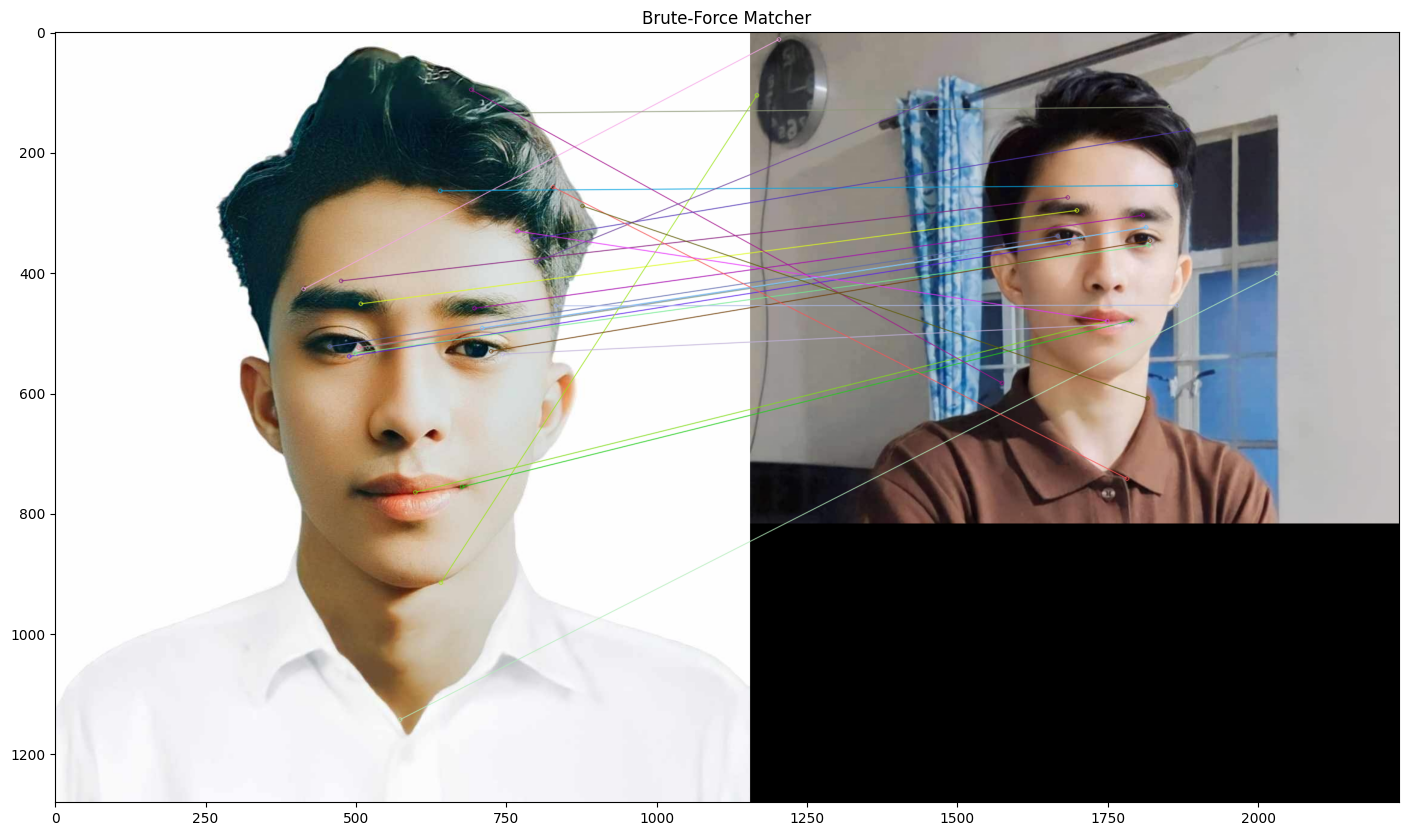

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('original_image1.jpg')
image2 = cv2.imread('original_image2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher()
matches_bf = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches_bf = []
for m, n in matches_bf:
    if m.distance < 0.75 * n.distance:
        good_matches_bf.append(m)

# Draw matches
image_matches_bf = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches_bf, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the images with matches
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(image_matches_bf, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Matcher')
plt.show()


#**Feature Matching with FLANN**


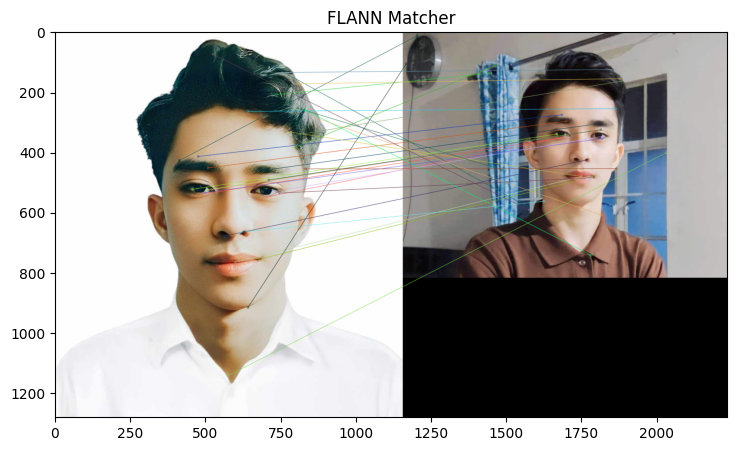

In [3]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('original_image1.jpg')
image2 = cv2.imread('original_image2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# FLANN Matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.75 * n.distance:
        good_matches_flann.append(m)

# Draw matches
image_matches_flann = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches_flann, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image with matches
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image_matches_flann, cv2.COLOR_BGR2RGB))
plt.title('FLANN Matcher')
plt.show()
